# MTH5001 Introduction to Computer Programming - Lecture 7

Module organisers Dr Lucas Lacasa and Prof. Thomas Prellberg

In the first half of this module, we focussed on introducing the basics of programming, i.e. data structures and flow control. We have already encountered several applications along the way, such as graphing functions and numerical evaluation of infinite sums, albeit at a very basic level.

Now that we have learned enough Python, we can start to consider mathematical applications in more depth.

The main topic of this lecture will be root finding, but before we come to this I need to introduce another way of defining functions in Python.

## Intermezzo: Lambda functions

Python knows a programming concept called [Lambda Functions](http://en.wikipedia.org/wiki/Anonymous_function). The name "Lambda" is used for historical reasons. It is related to a formal system in mathematical logic called [Lambda Calculus](https://en.wikipedia.org/wiki/Lambda_calculus). Regarding the choice of the name, see [here](https://math.stackexchange.com/questions/64468/why-is-lambda-calculus-named-after-that-specific-greek-letter-why-not-rho-calc).

Let us assume that a function has a body that is a simple one line statement, such as in
```python
def f(x):
    return x*x
```
Instead of this, we can write
```python
f = lambda x: x*x
```
with the keyword `lambda`. This is a lambda function, and the advantage is that we can use it without ever giving the function a name, which is why lambda functions are also called anonymous functions.

In [1]:
(lambda x: x*x)(-4)

16

A detailed discussion of lambda functions is more elaborate, but we will just want to use Lambda functions when convenient. Let us for a moment go back to the function we had defined to compute the difference quotient as an approximation of the derivative of a function (I am choosing this example because we will need it later in this lecture).

In [2]:
def g(f,x,h):
    "Compute the difference quotient for the function f at point x and x+h"
    return (f(x+h)-f(x))/h

To use it on $f(x)=x^2$, we needed to first define the function `f()`.

In [3]:
def f(x):
    return x**2
g(f,2,0.01)

4.009999999999891

Lambda functions allow us to write the same without ever defining `f()`:

In [4]:
g(lambda x: x**2,2,0.01)

4.009999999999891

You can use either, but I find lambda functions sometimes more convenient and will use them in the remainder of this lecture.

## Application I: Root finding

A general mathematical problem is to find solutions for an equation $F(x)=0$, given a function $F(x)$. This is called [root finding](http://en.wikipedia.org/wiki/Root-finding_algorithm), and many problems can be cast into this form. 

For example, if you want to find an extremum for a function $f(x)$, you will need to solve $f'(x)=0$ for a real variable $x$, and if you want to solve a linear system of $n$ equations, you will need to solve $Ax-b=0$ for a vector $x$.

For some of these problems there are explicit solution formulas available (such as the quadratic formula for solving $ax^2+bx+c=0$) or specific algorithms such as Gauss elimination for solving linear equations.

But for general problems, we need to resort to numerical methods to find approximate answers.

### The Bisection Method

Suppose that we have a continuous real-valued function $f(x)$ on an interval $[a,b]$, and that we want to find solutions to the equation $$f(x)=0\;.$$ If we know that the signs of $f(a)$ and $f(b)$ are opposite to each other, then the [intermediate value theorem](http://en.wikipedia.org/wiki/Intermediate_value_theorem) guarantees that there exists a solution on the interval $(a,b)$.

So now that we know under which conditions a solution exists, how can we actually compute it? The answer lies in the word *bisection* in the heading of this section. We simply divide the interval into two equal parts and apply the intermediate value theorem to both of them, to decide which one of these smaller intervals the root lies in. We choose that interval and repeat the bisection until the interval is sufficiently small.

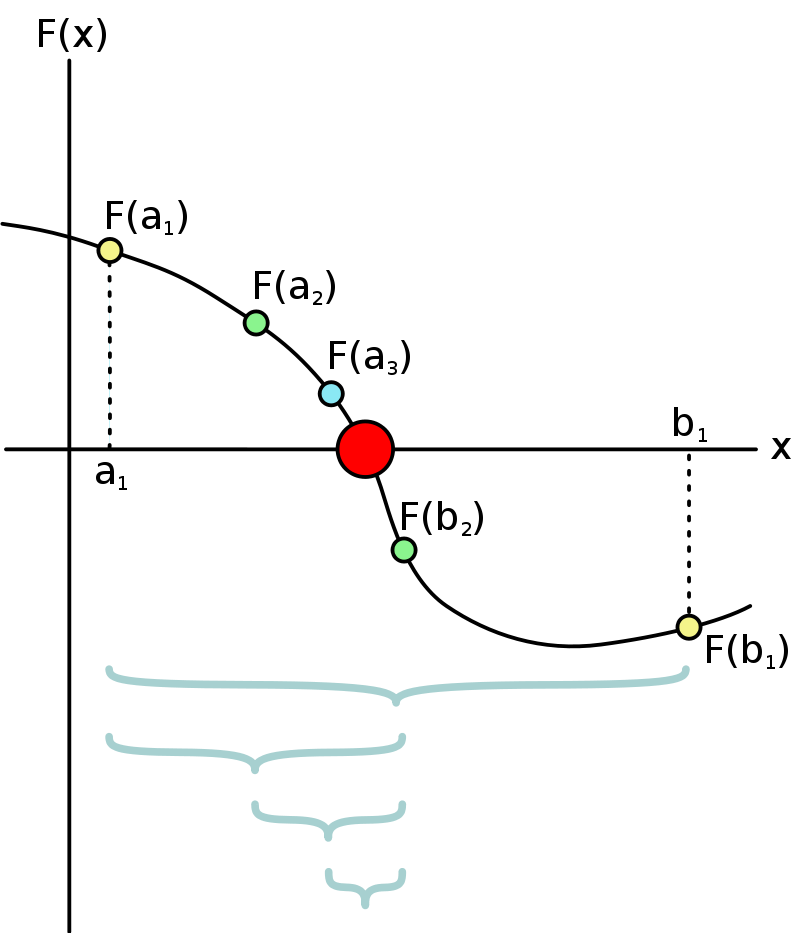

#### Algorithm

The chatty description above gives the idea of how to compute a root. We need to turn this informal description into Python code. To do so, we carefully write the steps down one by one, i.e. we write down the [algorithm](http://en.wikipedia.org/wiki/Algorithm).

1. Start with an interval $a,b$ such that $f(a)f(b)<0$, which is equivalent to $f(a)$ and $f(b)$ having opposite sign. (In particular, $f(a)$ and $f(b)$ should both be not equal to zero, otherwise we are done).
2. Compute the midpoint $m=(a+b)/2$. (If $f(m)$ is equal to zero, we are done.)
3. Determine in which subinterval $f$ changes sign:
   1. If $f(a)f(m)<0$ then let the next interval be $[a,m]$, i.e. replace the right boundary by $m$ by assigning $b=m$
   2. If $f(m)f(b)<0$ then let the next interval be $[m,b]$, i.e. replace the left boundary by $m$ by assigning $a=m$
4. Repeat steps (2.) and (3.) until the interval $[a,b]$ is sufficiently small.
5. Return the midpoint value $m$ as an approximation of the root.


There is still something missing in the above algorithm, as we haven't specified what *sufficiently small* means. We know that the interval shrinks by a factor $1/2$ during each iteration, which means that after $N$ iterations the initial interval size $b-a$ is reduced by a factor $(1/2)^N$ to $(b-a)/2^N$. As both the midpoint $m$ and a root $x$ are inside that interval, we know that the error is bounded by
$$|m-x|<\frac{b-a}{2^N}\;.$$
So if we want the error to be less than some given positive $\epsilon$, we need to iterate until $(b-a)/2^N<\epsilon$, or equivalently,
$$N>\frac1{\log2}\log\left(\frac{b-a}\epsilon\right)\;.$$

#### The Python code

The above algorithm now translates nicely into Python code. The central part of this algorithm looks as follows.
```python
def bisection(f,a,b,N):
    for n in range(N):
        m=(a+b)/2
        if f(a)*f(m)<0:
            b=m
        elif f(m)*f(b)<0:
            a=m
    return (a+b)/2
```
However, this doesn't cover everything that could happen, and the final code becomes a bit longer after adding the missing bits and putting some comments in.

In [5]:
def bisection(f,a,b,N):
    # step 0. check for the obvious
    if f(a)==0:
        print ("Found exact solution.")
        return a
    if f(b)==0:
        print ("Found exact solution.")
        return b
    # step 1. ensure that f(a)f(b)<0
    if f(a)*f(b)>0: # (it cannot be zero because we already excluded this)
        print("Bisection method fails.")
        return None # remember what None stands for!
    # now start the N-fold loop
    for n in range(N):
        # step 2. compute the midpoint
        m=(a+b)/2
        if f(m)==0:
            print ("Found exact solution.")
            return m
        # step 3.
        if f(a)*f(m)<0: # step 3.A.
            b=m
        elif f(m)*f(b)<0: # step 3.B.
            a=m
        else: # Logically, this should not happen. 
              # But we're dealing with floating point operations. (*)
            print("Bisection method fails.")
            return None # remember what None stands for!
    print("Computed approximate solution.")
    return (a+b)/2

Note that I have sneakily introduced the fact that we can finish the execution of a function *anywhere* inside the function by using return. I resisted the urge to do this previously for piecewise defined functions. One exercise for you will be to rewrite the bisection code using only one `return` statement at the end of the function.

Let us test this on a nice function such as $f(x)=(x-3)(x+1)$. We should have no problems finding the simple roots at $x=-1$ and $x=3$.

In [6]:
print(bisection(lambda x:(x-3)*(x+1),-5,0,8))
print(bisection(lambda x:(x-3)*(x+1),0,5,8))

Computed approximate solution.
-1.005859375
Computed approximate solution.
2.998046875


If the function has two roots very close to each other, it may be hard to find the right values of $a$ and $b$. We will look at this further in the lab.

Let us finally elaborate on (*) in the code for `bisection()` above: It could happen that $f(a)$, $f(b)$, and $f(m)$ are sufficiently small that the products are indistinguishable from zero. For example, let $f(x)=cx$ with a very small constant $c$:

In [7]:
print(bisection(lambda x: x,-2,1,30))
print(bisection(lambda x: 1e-100*x,-2,1,30))
print(bisection(lambda x: 1e-200*x,-2,1,30))

Computed approximate solution.
-4.656612873077393e-10
Computed approximate solution.
-4.656612873077393e-10
Bisection method fails.
None


### The Secant Method (regula falsi version)

You might think that we can be smarter than choosing the midpoint. The bisection method chooses the midpoint $(a+b)/2$ no matter what values $f(a)$ and $f(b)$ take. However, if $|f(a)|$ is much smaller than $|f(b)|$ then it seems likely that the actual root is closer to $a$ than to $b$. The secant method takes this into account by replacing the midpoint by the point at which the secant line connecting the endpoints $(a,f(a))$ and $(b,f(b))$ intersects with the $x$-axis.

The equation of the secant line passing through $(a,f(a))$ and $(b,f(b))$ is
$$y=f(a)+\frac{f(b)-f(a)}{b-a}(x-a)\;.$$
We want to determine the value of $x$ such that $y=0$, which gives
$$x=a-\frac{b-a}{f(b)-f(a)}f(a)=\frac{af(b)-bf(a)}{f(b)-f(a)}\;.$$
(Note that if $f(b)=-f(a)$ this reduced to the midpoint rule $x=(a+b)/2$ as it should.)

The only thing that we need to change in the bisection code is the calculation of m.

### The Secant Method (recursive version)

It turns out that in the secant method we can even abolish the interval testing that we did for the bisection method. In this case we can write the method as a recursion, always replacing the oldest estimate by the new one.

#### The Algorithm

1. Start with an interval $a,b$.
2. Let $x_1=a$ and $x_0=b$.
3. For $n$ from $1$ to $N-1$ repeat
$$x_{n+1}=\frac{x_nf(x_{n-1})-x_{n-1}f(x_n)}{f(x_{n-1})-f(x_n)}\;.$$
4. Return $x_N$

You will have noticed that we have turned the problem into a three-term recurrence $x_{n+1}=F(x_{n-1},x_n)$ without regard as to whether this algorithm converges.

#### The Python code

The recursive algorithm is extremely easy to implement.

In [8]:
def secant(f,a,b,N):
    x_new,x_old=a,b
    for n in range(1,N):
        x_new,x_old=(x_new*f(x_old)-x_old*f(x_new))/(f(x_old)-f(x_new)),x_new
    print("Computed approximate solution.")
    return x_new

Let us test this on the same function $f(x)=(x-3)(x+1)$ as above.

In [9]:
print(secant(lambda x:(x-3)*(x+1),-5,0,8))
print(secant(lambda x:(x-3)*(x+1),0,5,8))

Computed approximate solution.
-0.9999999999988037
Computed approximate solution.
-0.9993904297470284


But now the second function call has not converged to the root $f(3)=0$, even though $3$ is in the interval $(0,10)$. This shows the weakness of the secant method. Let us try again with a better choice of the interval.

In [10]:
print(secant(lambda x:(x-3)*(x+1),2,4,8))

Computed approximate solution.
2.9999999999999996


There is another problem we might encounter. If we choose $N$ too large, $f(b)$ and $f(a)$ might numerically be indistinguishable, and we divide by zero.

In [11]:
#print(secant(lambda x:(x-3)*(x+1),2,4,11)) #this gives a divide by zero error

### Newton's Method

The secant method used linear interpolation between two points on the graph of a continuous function. If the function $f$ is differentiable, we can do even better, as we have a well-defined tangent line to every point on the graph.

The equation of the tangent line passing through $(a,f(a))$ is
$$y=f(a)+f'(a)(x-a)\;.$$
We want to determine the value of $x$ such that $y=0$, which gives
$$x=a-\frac1{f'(a)}f(a)\;.$$
(Note that if we replace $f'(a)$ by the difference quotient $(f(b)-f(a))/(b-a)$ this reduces to the formula for the secant method above.)

![newtoniteration](https://austingwalters.com/wp-content/uploads/2014/03/NewtonIteration_Ani.gif)

#### The Algorithm

1. Start with a point $a$.
2. Let $x_0=a$.
3. For $n$ from $0$ to $N-1$ repeat
$$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}\;.$$
4. Return $x_N$

#### The Python code

Here, we need only one initial value for the iteration. However, for the iteration we need to compute the derivative (either exactly or numerically via the difference quotient).

In [12]:
def newton(f,df,a,N):
    x=a
    for n in range(N):
        x=x-f(x)/df(x)
    print("Computed approximate solution.")
    return x

In [13]:
print(newton(lambda x:x**2-2*x-3,lambda x:2*x-2,-5,8))
print(newton(lambda x:x**2-2*x-3,lambda x:2*x-2,5,8))

Computed approximate solution.
-1.0
Computed approximate solution.
3.0000000000000004


And if we don't know the derivative explicitly, let us use the difference quotient. Precision in the computation of $f'(x)$ isn't actually that important here, as what matters most is that for $x$ near the actual root the value of $f(x)$ becomes very small.

In [14]:
print(newton(lambda x:x**2-2*x-3,lambda x:g(lambda x:x**2-2*x-3,x,0.01),-5,8))
print(newton(lambda x:x**2-2*x-3,lambda x:g(lambda x:x**2-2*x-3,x,0.01),5,8))

Computed approximate solution.
-1.0000000000000007
Computed approximate solution.
3.0


Don't you just *love* the Lambda functions used above??? Let us unpack this: `newton()` has as first argument a lambda function computing $x^2-2x-3$. The second argument is a lambda function that involves the function `g()`, which computes the difference quotient of the same function $x^2-2x-3$. The above is an example of badly written code. It is much more readable if we define $f(x)=x^2-2x-3$ separately:

In [15]:
f=lambda x:x**2-2*x-3
print(newton(f,lambda x:g(f,x,0.01),-5,8))
print(newton(f,lambda x:g(f,x,0.01),5,8))

Computed approximate solution.
-1.0000000000000007
Computed approximate solution.
3.0


You see that while lambda functions are useful, sometimes they obscure what's going on.

### Comparison of the Methods

It is instructive to compare the behaviour of the algorithms. Let us compute the positive root of $\cos(x)=x$ with all three methods.

In [20]:
import numpy as np
print(bisection(lambda x: np.cos(x)-x,0,3,7))
print(secant(lambda x:np.cos(x)-x,0,3,7))
print(newton(lambda x:np.cos(x)-x,lambda x:-np.sin(x)-1,3,7))
print()
print("let us compare this with the 'exact' root obtained by Newton iteration")
root=newton(lambda x:np.cos(x)-x,lambda x:-np.sin(x)-1,3,100)
print(root,np.cos(root),np.cos(root)-root)

Computed approximate solution.
0.73828125
Computed approximate solution.
0.7390851332151566
Computed approximate solution.
0.7390851332151606

let us compare this with the 'exact' root obtained by Newton iteration
Computed approximate solution.
0.7390851332151607 0.7390851332151607 0.0


All methods work, but it seems that the recursive secant method is much better than bisection, and the Newton iteration is best.

### Formal Analysis of the Rate of Convergence

Let us see if we can quantify the performance of these algorithms. Essentially we would like to check how quickly the iteration approaches an actual root $f(a)=0$ for a given function $f$.

In other words, the goal of a root finding algorithm is to reduce the difference $\epsilon=x-a$ by iteration. If the iteration is given by a sequence $x_0,x_1,x_2\ldots$, we should therefore study how fast the differences $\epsilon_k=x_k-a$ converge to zero.

#### Bisection

For the bisection algorithm we have already performed this analysis above. At each iteration the interval in which the root can be found shrinks by a factor of $1/2$, so necessarily the error $\epsilon_k$ is bounded by $$|\epsilon_k|<\frac C{2^k}\;.$$ 

for some constant $C>0$.

#### The other methods

Remember that for the the bisection method we only needed to assume continuity of the function $f$. To analyse the other methods, assume that we have a smooth function $f$ (meaning practically that we can compute all the derivatives we need) which has a simple root at $x=a$, i.e. $f(a)=0$ and the Taylor series about $x=a$ is given by 
$$f(x)=f'(a)\,(x-a)+\frac12f''(a)\,(x-a)^2+\ldots\;.$$


#### Secant Method

To analyse the secant method, we simply replace $x_k$ by $a+\epsilon_k$ in 
$$x_{n+1}=\frac{x_nf(x_{n-1})-x_{n-1}f(x_n)}{f(x_{n-1})-f(x_n)}\;,$$

which gives

$$\epsilon_{n+1}=\frac{(a+\epsilon_n)f(a+\epsilon_{n-1})-(a+\epsilon_{n-1})f(a+\epsilon_n)}{f(a+\epsilon_{n-1})-f(a+\epsilon_n)}-a\;.$$


Using the above Taylor expansion of $f$ to second order, i.e. $f(a+\epsilon)\approx f'(a)\epsilon+\frac12f''(a)\epsilon^2$, this gives after some calculation
$$\epsilon_{n+1}\approx\frac{f''(a)}{2f'(a)}\epsilon_n\epsilon_{n-1}\;.$$

To solve this approximate iteration for $\epsilon_n$, we write $\epsilon_{n}=A\epsilon_{n-1}^\lambda$ for some constant $A$ and some exponent $\lambda$ still to be determined. This means that we have
$$A\epsilon_n^\lambda=\frac{f''(a)}{2f'(a)}\epsilon_n A^{-1/\lambda}\epsilon_n^{1/\lambda}\;.$$

From this, we can obtain the value of the constant $A$ and, more importantly, by comparing powers in $\epsilon_n$ we find that the exponent $\lambda$ satisfies
$$\lambda=1+1/\lambda\;,$$

from which we find that $\lambda$ is given by the golden mean $\lambda=\frac12(1+\sqrt5)\approx1.618$. Our final result is therefore
$$\epsilon_{n+1}\approx A\epsilon_n^{1.618}$$

#### Newton Method

To analyse the Newton method, we similarly replace $x_k$ by $a+\epsilon_k$ in 
$$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}\;,$$

which gives

$$\epsilon_{n+1}=\epsilon_n-\frac{f(a+\epsilon_n)}{f'(a+\epsilon_n)}\;.$$


Using the above Taylor expansion of $f$ to second order, i.e. $f(a+\epsilon)\approx f'(a)\epsilon+\frac12f''(a)\epsilon^2$, this gives after some calculation
$$\epsilon_{n+1}\approx\frac{f''(a)}{2f'(a)}\epsilon_n^2\;.$$

#### Comparison

To compare the results, we restate the result of the bisection method analysis slightly.
##### Bisection Method:
$$|\epsilon_{n+1}|\approx C_1|\epsilon_n|\;,$$

with $C_1=1/2$. For the other two methods we have found
##### Secant Method:
$$|\epsilon_{n+1}|\approx C_2|\epsilon_n|^{1.618}\;,$$

and
##### Newton Method:
$$|\epsilon_{n+1}|\approx C_3|\epsilon_n|^2\;.$$

with positive constants $C_2$ and $C_3$. 

The main point here is that in all three cases the speed of convergence is governed by the exponent $p$ in 
$$|\epsilon_{n+1}|\approx C_p|\epsilon_n|^p\;.$$

***The intuitive meaning of the exponent $p$ is that after each iteration the number of correct digits of the approximated root $x_n$ increases roughly by a factor of $p$.*** 

The larger the value of $p$, the faster the convergence. For the bisection method we speak of *linear* convergence, and for the Newton method we speak of *quadratic* convergence, where the number of correct digits doubles at each iteration! The rate of convergence for the secant method is somewhat inbetween, which matches with our numerical observation above.

### Can the Algorithms fail?

For the bisection method, we have proved convergence provided we start iterating with $x_0$ and $x_1$ having opposite signs. The moment we move to a recursive method, however, convergence is only assured if we start iterating sufficiently close to a root. For the secant method and the Newton method, problems arise if the iteration gets close to an extremum of the function, where the denominators in the recursion formulas can become small and you end up dividing by a value close to zero, leading to $x_{n+1}$ becoming very large therefore very far away from $x_n$.

Another issue arises if there is an unbounded derivative. As an example, consider the Newton method for $f(x)=x^{1/3}$. In this case
$$x_{n+1}=x_n-\frac{x_n^{1/3}}{\frac13x_n^{-2/3}}=-2x_n\;.$$
Iteration of this gives $x_n=(-2)^nx_0$, which diverges for any $x_0\ne0$.




### The Newton Method for Complex Functions

As the Newton Method only needs a single starting point to commence the iteration, this Method even works for complex-valued functions. Let us try solving $f(z)=z^2+1$, which has no real-valued roots. The method will fail if we start iteration from a real value, but a complex-valued starting point will do nicely.

In [17]:
newton(lambda z:z**2+1,lambda z:2*z,1+1j,6)

Computed approximate solution.


(8.463737877036721e-23+1j)

Iteration in the complex plane can get really complicated, and there is a lot more that could be said about this.
![prettypicture](https://i.stack.imgur.com/Rd9q2.png)
You can read more [here](https://austingwalters.com/newtons-method-and-fractals/) if you wish. We'll continue this in the labs.

## Conclusion and Outlook

In this lecture we have discussed root finding algorithms (and in passing have introduced lambda functions). Next week we'll continue with some Linear Algebra.